# Text Analysis

## Feature Engineering Text Data

In datasets with numerical values, it is easier to plot data in bar charts and correlation heat maps. Those charts are used to find out the observered variance of each feature in the fitted model. This is not an straight forward task in text data: text is not numerical value, it is high dimensional data, and additional steps are required to prepare the data. 

In this lab, you will explore some of the techniques from the book "Applied Text Analysis with Python" by Tony Ojeda, Benjamin Bengfort, and Rebecca Bilbro Published by O'Reilly Media, Inc., 2018. 

In the context of text data, feature analysis means:
- Understand what is in the corpus
- Documents length, vocabulary
- N-grams patterns or combinations of n-grams and what they tell us about the documents
- Is the corpus highly technical with many domain-specific phrases? 
- Translation
- Punctuation use
- etc. 

The first visualization that can be done is to see what is the frequency of a term over time. A very simple example will be done here:

There is a "news.csv" file that contains the highlights of News about snowstorm on Google. Each news highligh has a time stamp in the first column. Note that the dates are not real!

### Reading and pre-processing

Read the file and see what is inside for the first 5 lines. 

In [1]:
import pandas as pd
df = pd.read_csv("news.csv")
df.head()

,Date,news
0,2019-02-21,PennDOT lifts some restrictions after snow sto...
1,2019-02-21,A sprawling storm so massive it simultaneously...
2,2019-02-21,"As one storm leaves, a new one will cross the ..."
3,2019-02-21,"A storm will unload feet of snow, create blizz..."
4,2019-02-21,The Las Vegas Valley's second snow fall in a w...


Create a Datetime object for each news and count the number of the keyword "storm" appearance in each news. Create a table as below. 

Note: make the string to lower case as the first step for pre-processing the text data. This way, *Storm* and *strom* will be considered as one word. 



In [2]:
df['Date'] = pd.to_datetime(df['Date'])
print(type(df['Date'][0]))

<class 'pandas._libs.tslib.Timestamp'>


In [3]:
# Using string.count() method
df['storm_count'] = df['news'].map(lambda x: x.lower().count('storm'))

In [4]:
# Tokenize the string and then use FreqDist
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import unidecode

df['tokenized_word'] = df['news'].map(lambda x: word_tokenize(x.lower()))
df['storm_count2'] = df['tokenized_word'].map(lambda x: FreqDist(x)['storm'])
df.head(10)

,Date,news,storm_count,tokenized_word,storm_count2
0,2019-02-21,PennDOT lifts some restrictions after snow sto...,2,"[penndot, lifts, some, restrictions, after, sn...",2
1,2019-02-21,A sprawling storm so massive it simultaneously...,1,"[a, sprawling, storm, so, massive, it, simulta...",1
2,2019-02-21,"As one storm leaves, a new one will cross the ...",2,"[as, one, storm, leaves, ,, a, new, one, will,...",2
3,2019-02-21,"A storm will unload feet of snow, create blizz...",1,"[a, storm, will, unload, feet, of, snow, ,, cr...",1
4,2019-02-21,The Las Vegas Valley's second snow fall in a w...,0,"[the, las, vegas, valley, 's, second, snow, fa...",0
5,2019-02-21,Anne Arundel County Public Schools are out of ...,1,"[anne, arundel, county, public, schools, are, ...",0
6,2019-02-21,Wednesday's snow blitz dropped 8.9 inches of f...,0,"[wednesday's, snow, blitz, dropped, 8.9, inche...",0
7,2019-02-21,A new record for snow in the Twin Cities in Fe...,0,"[a, new, record, for, snow, in, the, twin, cit...",0
8,2019-02-21,Major winter storm barrels into Arizona; snowy...,2,"[major, winter, storm, barrels, into, arizona,...",2
9,2019-02-21,LAS VEGAS - The Las Vegas valley is preparing ...,2,"[las, vegas, -, the, las, vegas, valley, is, p...",2


In [5]:
df2 = df.groupby("Date").aggregate({"storm_count":"sum", "storm_count2":"sum"})
df2

,storm_count,storm_count2
Date,,
2019-02-19,16,10
2019-02-20,8,3
2019-02-21,12,11
2019-02-22,3,1
2019-02-23,1,1
2019-02-24,1,0
2019-02-25,1,0
2019-02-26,1,1
2019-02-27,1,0


### Chart time for token frequency 

Run a group by and see how many times storm happened in each day. Create a token frequency for "storm" over time. 

In [6]:
df2 = df.groupby("Date").aggregate({"storm_count":"sum"})
df2.reset_index(inplace=True)
print(df2)

        Date  storm_count
0 2019-02-19           16
1 2019-02-20            8
2 2019-02-21           12
3 2019-02-22            3
4 2019-02-23            1
5 2019-02-24            1
6 2019-02-25            1
7 2019-02-26            1
8 2019-02-27            1
9 2019-02-28            1


In [7]:
df2['Day'] = df2['Date'].map(lambda x: x.day)
df2.head()

,Date,storm_count,Day
0,2019-02-19,16,19
1,2019-02-20,8,20
2,2019-02-21,12,21
3,2019-02-22,3,22
4,2019-02-23,1,23


In [8]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

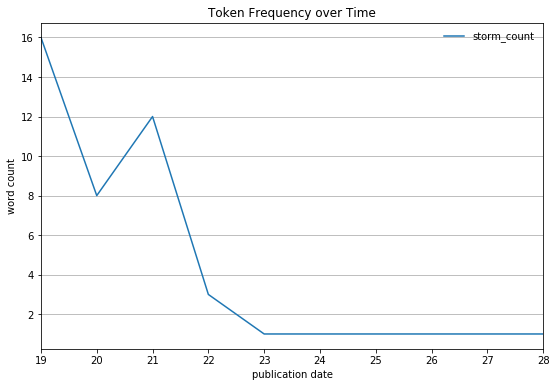

In [9]:
figure(figsize=(9, 6))
plt.plot('Day','storm_count', data=df2)
plt.xlabel("publication date")
plt.ylabel("word count")
plt.title("Token Frequency over Time")
plt.xticks(np.arange(min(df2['Day']), max(df2['Day']+1), 1.0))
plt.xlim(left=min(df2['Day']))
plt.xlim(right=max(df2['Day']))
plt.legend(frameon=False)
plt.grid(axis='y')

For larger text, and real n-gram token visualization over time, you will see something like this: https://books.google.com/ngrams

### Stop Words 
Calculate the number of words and the number of stop words in each news. Plot how many words are there is each news highlight: 

In [10]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
print(stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yizhe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
{'being', 'while', 'herself', 'some', 'until', 'were', 're', "you've", 'yours', 'or', 'more', 'aren', 'over', 'him', 'of', "doesn't", 'you', 'can', 'haven', 'both', "isn't", 'from', 'off', 'them', "wouldn't", 'they', "it's", 'himself', 'is', 'above', 'then', 'will', 'm', "couldn't", 'no', 'hadn', 'this', 'by', 'who', 'he', 've', 'couldn', "mustn't", 'wouldn', 'shouldn', 'with', 'under', "you're", 'its', 'when', 'an', 'it', 'after', 'has', 'about', 'very', 'itself', 'doing', 'than', 'below', 'each', 'not', 'too', 'isn', 'all', "haven't", 'doesn', 'yourself', 'into', 'been', 'against', 'up', 't', 'your', "mightn't", 'nor', 's', "hasn't", "you'll", 'mustn', 'again', 'does', 'why', 'how', 'on', 'there', 'y', 'wasn', 'those', 'mightn', 'before', 'don', 'didn', 'which', 'are', "weren't", 'now', 'had', 'only', 'most', "that'll", 'to', 

In [11]:
# Function for removing stopwords
def word_filter(tokenized_words):
    filtered_words = []
    for w in tokenized_words:
        if w not in stop_words:
            filtered_words.append(w)
    return filtered_words

In [12]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

df['tokenized_words'] = df['news'].map(lambda x: tokenizer.tokenize(x.lower()))
df['filtered_words'] = df['tokenized_words'].apply(word_filter)
df['num_of_words'] = df['tokenized_words'].map(lambda x: len(x))
df['num_of_filtered_words'] = df['filtered_words'].map(lambda x:len(x))
df['stop_words'] = df['num_of_words'] - df['num_of_filtered_words']
df.head()

,Date,news,storm_count,tokenized_word,storm_count2,tokenized_words,filtered_words,num_of_words,num_of_filtered_words,stop_words
0,2019-02-21,PennDOT lifts some restrictions after snow sto...,2,"[penndot, lifts, some, restrictions, after, sn...",2,"[penndot, lifts, some, restrictions, after, sn...","[penndot, lifts, restrictions, snow, storm, pa...",24,13,11
1,2019-02-21,A sprawling storm so massive it simultaneously...,1,"[a, sprawling, storm, so, massive, it, simulta...",1,"[a, sprawling, storm, so, massive, it, simulta...","[sprawling, storm, massive, simultaneously, du...",19,11,8
2,2019-02-21,"As one storm leaves, a new one will cross the ...",2,"[as, one, storm, leaves, ,, a, new, one, will,...",2,"[as, one, storm, leaves, a, new, one, will, cr...","[one, storm, leaves, new, one, cross, country,...",25,14,11
3,2019-02-21,"A storm will unload feet of snow, create blizz...",1,"[a, storm, will, unload, feet, of, snow, ,, cr...",1,"[a, storm, will, unload, feet, of, snow, creat...","[storm, unload, feet, snow, create, blizzard, ...",23,14,9
4,2019-02-21,The Las Vegas Valley's second snow fall in a w...,0,"[the, las, vegas, valley, 's, second, snow, fa...",0,"[the, las, vegas, valley, s, second, snow, fal...","[las, vegas, valley, second, snow, fall, week,...",26,18,8


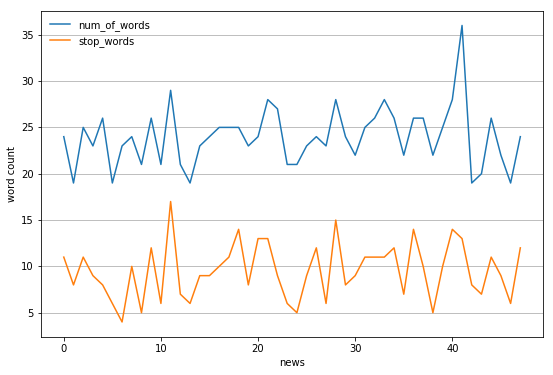

In [13]:
figure(figsize=(9, 6))
plt.plot('num_of_words',data=df)
plt.plot('stop_words',data=df)
plt.xlabel("news")
plt.ylabel("word count")
plt.legend(frameon=False)
plt.grid(axis='y')

Now, remove the stop words from the news column. Count the number of words and visualize again.


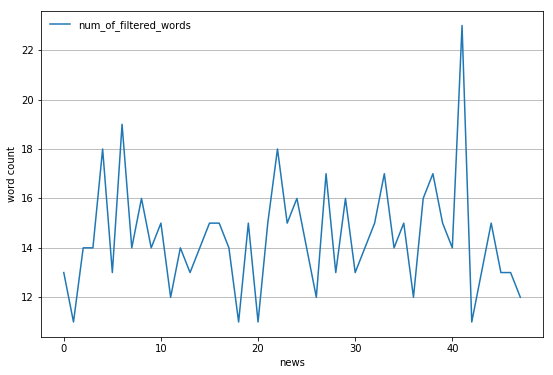

In [14]:
figure(figsize=(9, 6))
plt.plot('num_of_filtered_words',data=df)
plt.xlabel("news")
plt.ylabel("word count")
plt.legend(frameon=False)
plt.grid(axis='y')

## Finding n-grams

Make a table like the following that shows 1-Grams, 2-Grams, 3-Grams, and 4-Grams and the number of occurrence in each in a table. BAsically n-gram means frequent sequences of n words that are occurring together. For example, usually we are saying: "eat cat", "snow storm", etc. 

This is a pre-processing for building your models. But since there is no background, we will not continue this part. You can visualize the n-grams. For help, refer to the chapter of the text book in the above. The visualization part of n-grams is optional. 


In [15]:
from nltk import ngrams
Bigrams_collector = []

for i in range(0,len(df)):
    for item in list(ngrams(df['tokenized_words'][i],2)):
        Bigrams_collector.append(item)
Bigrams_collector

[('penndot', 'lifts'),
 ('lifts', 'some'),
 ('some', 'restrictions'),
 ('restrictions', 'after'),
 ('after', 'snow'),
 ('snow', 'storm'),
 ('storm', 'and'),
 ('and', 'the'),
 ('the', 'pa'),
 ('pa', 'turnpike'),
 ('turnpike', 'has'),
 ('has', 'lifted'),
 ('lifted', 'some'),
 ('some', 'restrictions'),
 ('restrictions', 'that'),
 ('that', 'were'),
 ('were', 'in'),
 ('in', 'place'),
 ('place', 'due'),
 ('due', 'to'),
 ('to', 'the'),
 ('the', 'winter'),
 ('winter', 'storm'),
 ('a', 'sprawling'),
 ('sprawling', 'storm'),
 ('storm', 'so'),
 ('so', 'massive'),
 ('massive', 'it'),
 ('it', 'simultaneously'),
 ('simultaneously', 'dumped'),
 ('dumped', 'snow'),
 ('snow', 'in'),
 ('in', 'minnesota'),
 ('minnesota', 'and'),
 ('and', 'virginia'),
 ('virginia', 'and'),
 ('and', 'heavy'),
 ('heavy', 'rains'),
 ('rains', 'from'),
 ('from', 'indiana'),
 ('indiana', 'to'),
 ('as', 'one'),
 ('one', 'storm'),
 ('storm', 'leaves'),
 ('leaves', 'a'),
 ('a', 'new'),
 ('new', 'one'),
 ('one', 'will'),
 ('will',

In [16]:
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import *
from nltk.tokenize import RegexpTokenizer
from collections import Counter
from nltk.corpus import stopwords
import nltk, re, string, collections
import nltk
nltk.download('stopwords')


# You can use the following lines if you like:
ps = PorterStemmer()

tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

#Tip:
#You may need lots of helper functions to process the data (you have some of them above)
# Then create a function that generates the table. 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yizhe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
import pandas as pd
df = pd.read_csv("news.csv")

In [18]:
text = ''
for i in range(0, len(df)):
    text = text + df['news'][i] + '. '

text = text.lower()
# get rid of all the XML markup
text = re.sub('<.*>','',text)

# get rid of the "ENDOFARTICLE." text
text = re.sub('ENDOFARTICLE.','',text)

# get rid of punctuation (except periods!)
punctuationNoPeriod = "[" + re.sub("\.","",string.punctuation) + "]"
text = re.sub(punctuationNoPeriod, "", text)

tokenized_words = tokenizer.tokenize(text)
filtered_words = word_filter(tokenized_words)

# 1-Gram Occurrence
Unigrams = ngrams(filtered_words, 1)
UnigramFreq = collections.Counter(Unigrams)
Uni_20 = UnigramFreq.most_common(20)

# 2-Gram Occurrence
Bigrams = ngrams(filtered_words, 2)
BigramFreq = collections.Counter(Bigrams)
Bi_20 = BigramFreq.most_common(20)

# 3-Gram Occurrence
Trigrams = ngrams(filtered_words, 3)
TrigramFreq = collections.Counter(Trigrams)
Tri_20 = TrigramFreq.most_common(20)

# 4-Gram Occurrence
Quagrams = ngrams(filtered_words, 4)
QuagramFreq = collections.Counter(Quagrams)
Qua_20 = QuagramFreq.most_common(20)

In [19]:
df1 = pd.DataFrame(list(Uni_20))
df1.columns =  ['1-Gram','Occurrence']
df1['1-Gram'] = df1['1-Gram'].map(lambda x: x[0])

df2 = pd.DataFrame(list(Bi_20))
df2.columns = ['2-Gram','Occurrence']
df2['2-Gram'] = df2['2-Gram'].map(lambda x: "{} {}".format(x[0],x[1]))

df3 = pd.DataFrame(list(Tri_20))
df3.columns = ['3-Gram','Occurrence']
df3['3-Gram'] = df3['3-Gram'].map(lambda x: "{} {} {}".format(x[0],x[1],x[2]))

df4 = pd.DataFrame(list(Qua_20))
df4.columns = ['4-Gram','Occurrence']
df4['4-Gram'] = df4['4-Gram'].map(lambda x: "{} {} {} {}".format(x[0],x[1],x[2],x[3]))

df_final = pd.concat([df1, df2, df3, df4], axis=1, ignore_index=False)
df_final

,1-Gram,Occurrence,2-Gram,Occurrence,3-Gram,Occurrence,4-Gram,Occurrence
0,snow,40,winter storm,8,twin cities february,2,thundersnow thunderstorm produces snow,2
1,storm,28,snow storm,7,major winter storm,2,thunderstorm produces snow instead,2
2,wednesday,13,inches snow,4,thundersnow thunderstorm produces,2,produces snow instead rain,2
3,winter,11,new mexico,3,thunderstorm produces snow,2,snow instead rain reported,2
4,snowstorm,11,las vegas,3,produces snow instead,2,instead rain reported wednesday,2
5,inches,8,wednesday night,3,snow instead rain,2,rain reported wednesday several,2
6,night,7,twin cities,3,instead rain reported,2,reported wednesday several states,2
7,rain,7,county public,2,rain reported wednesday,2,wednesday several states including,2
8,valley,6,wednesdays snow,2,reported wednesday several,2,several states including portions,2
9,new,5,cities february,2,wednesday several states,2,states including portions maryland,2


### Frequency Distribution 

You can show the frequency distribution of 1-grams. The simpleset way is to install **yellowbrick** package and use the following code to visualize the frequency of the words in the "news" section of the data. Remember to remove the stop words. 

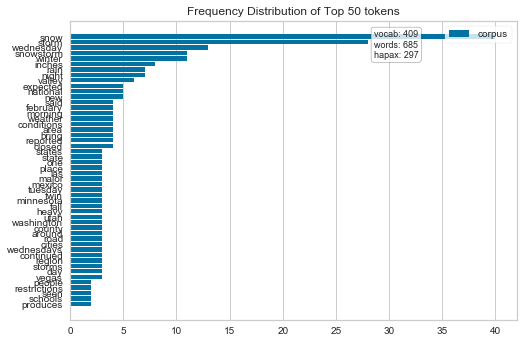

In [20]:
from yellowbrick.text.freqdist import FreqDistVisualizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
#complete the following line: 
docs = vectorizer.fit_transform(filtered_words)
features = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.poof()

## WordCloud 

Create a text from the news dataset. Install **pillow** and **wordcloud** packages and generate a word cloud of the news.

You can play with the coloring, fonts, and font sizes. 

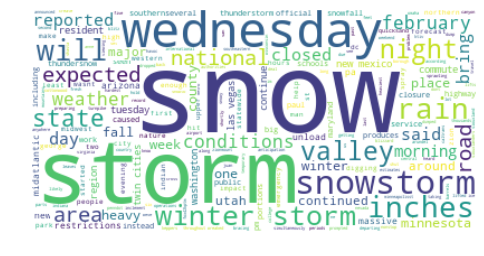

In [21]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#enter code here (1 line)
wordcloud = WordCloud(max_font_size=100, max_words=500, background_color="white").generate(text)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#save it to file: 
